# Lucas-Kanade Optical flow calculation

## import libraries

In [131]:
import numpy as np
from scipy import signal
import matplotlib.image as img
import matplotlib.pyplot as plt
import cv2

## Lucas-Kanade function

In [183]:
def optical_flow(I1g, I2g, window_size, tau=1e-2):
 
    kernel_x = np.array([[-1., 1.], [-1., 1.]])
    kernel_y = np.array([[-1., -1.], [1., 1.]])
    kernel_t = np.array([[1., 1.], [1., 1.]])#*.25
    w = window_size/2 # window_size is odd, all the pixels with offset in between [-w, w] are inside the window
    I1g = I1g / 255. # normalize pixels
    I2g = I2g / 255. # normalize pixels
    # Implement Lucas Kanade
    # for each point, calculate I_x, I_y, I_t
    mode = 'same'
    fx = signal.convolve2d(I1g, kernel_x, boundary='symm', mode=mode)
    fy = signal.convolve2d(I1g, kernel_y, boundary='symm', mode=mode)
    ft = signal.convolve2d(I2g, kernel_t, boundary='symm', mode=mode) + signal.convolve2d(I1g, -kernel_t, boundary='symm', mode=mode)
    u = np.zeros(I1g.shape)
    v = np.zeros(I1g.shape)
    # within window window_size * window_size
    w = int(w)
    for i in range(w, I1g.shape[0]-w):
        for j in range(w, I1g.shape[1]-w):
            Ix = fx[i-w:i+w+1, j-w:j+w+1].flatten()
            Iy = fy[i-w:i+w+1, j-w:j+w+1].flatten()
            It = ft[i-w:i+w+1, j-w:j+w+1].flatten()
           
            #b = ... # get b here
            #S = ... # get S here
            """
            S = np.array([Ix, Iy]).T
            #print(S.shape)
            t = It
            STS = np.matmul(S.T,S)
            eigenvalues = np.linalg.eigvals(STS)
            # if threshold τ is larger than the smallest eigenvalue of A'A:
            if np.min(abs(eigenvalues)) >= tau:
                STSinv = np.linalg.inv(np.matmul(S.T,S)) # get velocity here
                V = np.matmul(np.matmul(STSinv, S.T), t)
                u[i,j] = V[0]
                v[i,j] = V[1]
            # else leave zeros
            """
            b = np.reshape(It, (It.shape[0],1)) # get b here
            A = np.vstack((Ix, Iy)).T # get A here

            if np.min(abs(np.linalg.eigvals(np.matmul(A.T, A)))) >= tau:
                nu = np.matmul(np.linalg.pinv(A), b) # get velocity here
                u[i,j]=nu[0]
                v[i,j]=nu[1]
            
 
    return (u,v)

# convert image to greyscale

In [165]:
def togreyscale(I):
    if len(I.shape) < 3:
        return I
    num_channel = I.shape[2]
    if num_channel == 3:
        retval = np.mean(I, axis=2)
    return retval
    

# visualize optical flow

In [174]:
def drawOpticalFlow(u, v):
    #u = u/np.max(u) * 255
    #v = v/np.max(v) * 255
    B = np.zeros(u.shape)
    retval = np.dstack((u, v, B))


    return retval

    

# results

___

3.458334043012222
(256, 256) (256, 256)


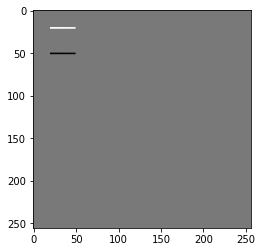

In [199]:
DATA_TYPE = "squareFrame"

I1 = img.imread('data/' + DATA_TYPE + '1.png')
I2 = img.imread('data/' + DATA_TYPE + '2.png')



I1g = togreyscale(I1)
I2g = togreyscale(I2)

if (I1g.shape != I2g.shape):
    print(I1g.shape, I2g.shape)
    I2g = cv2.resize(I2g, I1g.shape)


plt.imshow(I1g-I2g, cmap='gray')

u, v = optical_flow(I1g, I2g, 4, tau=0)
print(np.max(u))
print(u.shape, v.shape)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(256, 256, 3)


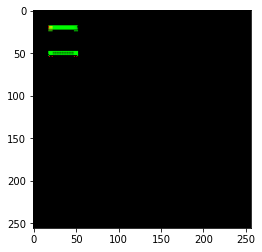

In [200]:
result = drawOpticalFlow(u, v)

plt.imshow(I1)

plt.imshow(I2)
plt.imshow(result)
print(result.shape)